In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from fullfrlm import flow_refueling_location_model
import networkx as nx

In [2]:
## Load necessary data
G = pickle.load(open('data/revised_cleaning_results/cleaned_network.p', 'rb'))
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
df_ivs = pickle.load(open("data/revised_cleaning_results/ivs_exploded_100.p", "rb"))
paths = pickle.load(open("data/revised_cleaning_results/paths_ship_specific_routes.p", "rb"))
path_lengths = pickle.load(open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb"))

In [3]:
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])

harbour_nodes = df_h.harbour_node.unique()

#extract data
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
 

# add degree to dataframes
df_links['degree_source'] = df_links.source.apply(lambda x: G.degree[x])
df_links['degree_target'] = df_links.source.apply(lambda x: G.degree[x])
df_nodes['degree'] = G.degree
df_nodes['degree'] = df_nodes.degree.apply(lambda x: x[1])

In [4]:
nodes_to_keep = df_nodes.loc[(df_nodes.degree!=2)|(df_nodes.n.isin(harbour_nodes))]

In [5]:
keep = list(nodes_to_keep.n)

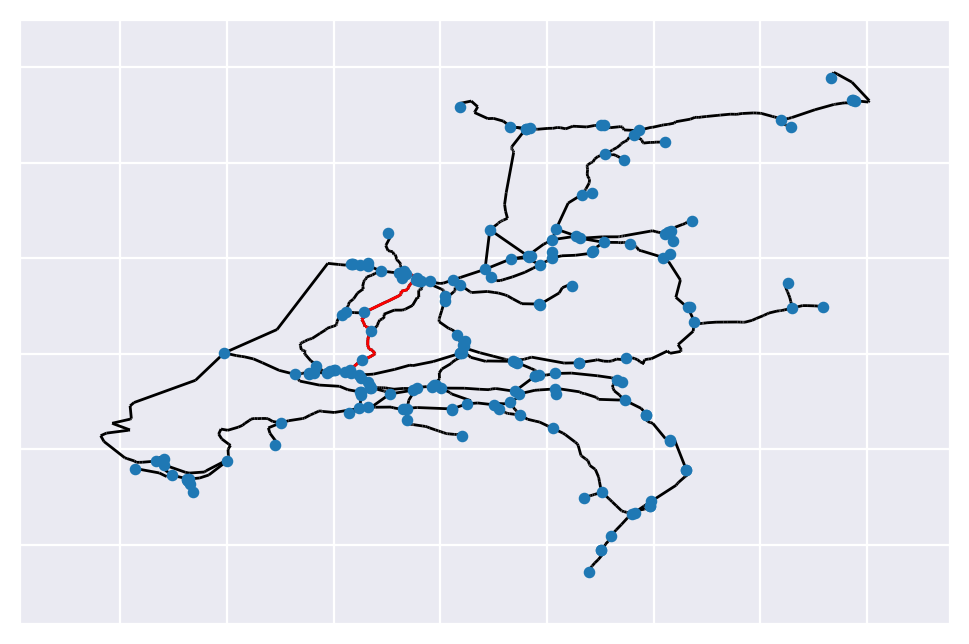

In [6]:
plt.subplots(dpi=200)
nx.draw_networkx_edges(G, pos_dict)
nx.draw_networkx_nodes(G, pos_dict, keep, node_size=10)
H = G.subgraph(paths[('NLRTM', 'NLAMS', 0)])
nx.draw_networkx_edges(H, pos_dict, edge_color='r')

In [7]:
new_edges = []
for key, route in paths.items():
    print(key)
    print(route)
    new_route = []
    for node in route:
        if node in keep:
            new_route.append(node)
    print(new_route)
    sub_routes = {i:[] for i in range(len(new_route)-1)}
    r = 0

    for i, node in enumerate(route):
        sub_routes[r].append(node)
        if (node in keep) and (i>0) and (node != route[-1]):
            sub_routes[r+1].append(node)
            r+=1
    for sub_route in sub_routes.values():
        paths[key] = sub_route
        path_length = 0
        print(sub_route)
        if len(sub_route) > 2:
            path_length = 0
            for j in range(len(sub_route)-1):
                path_length += nx.dijkstra_path_length(G, sub_route[j], sub_route[j+1], weight='length_m')
            new_edges.append((sub_route[0], sub_route[-1], path_length))
        else:
            path_length += nx.dijkstra_path_length(G, sub_route[0], sub_route[1], weight='length_m')
            new_edges.append((sub_route[0], sub_route[-1], path_length))
    # for i in range(len(new_route)-1):
    #     new_edges.append((new_route[i],new_route[i+1],path_l))


('NLRTM', 'NLAMS', 0)
['8863306', '8864009', '8866439', '8861193', 'B4308_B', 'B4308_A', '8861191', '8867588', '8863742', '8867374', 'B4913_B', 'B4913_A', 'L24895_B', 'L24895_A', '8864798', '8867538', '8867549', '8860860', '8868116', '8865170', '8866907', 'B23943_B', 'B23943_A', 'L7804_B', 'L7804_A', 'B57545_B', 'B57545_A', '8865214', 'B32055_B', 'B32055_A', 'B18202_B', 'B18202_A', 'B51737_B', 'B51737_A', 'B17709784_B', 'B17709784_A', 'B19102_B', 'B19102_A', 'B46036_B', 'B46036_A', '30985789', '8866363', 'B46356_B', 'B46356_A', 'B26151_B', 'S58510_A', 'B26151_A', '8863360', 'B26963_A', 'B26963_B', 'B3446_A', 'B3446_B', 'B41042_A', 'B41042_B', 'B33731_A', 'B33731_B', '8862496', 'B27700_B', 'B27700_A', 'S46906_B', 'S46906_A', 'B50163_B', 'B50163_A', '8860982', '8867583', '8865263', '8865954', 'S20232_B', 'S20232_A', '8861413', '8862716', 'S45168_B', 'S45168_A', 'B25728_B', 'B25728_A', 'S47428_B', 'S47428_A', 'B50505_B', 'B50505_A', 'B10908_B', 'B10908_A', 'B56925_B', 'B56925_A', 'B7755_B

In [8]:
G = G.subgraph(keep)
G = nx.Graph(G)
G.add_weighted_edges_from(new_edges,'length_m')

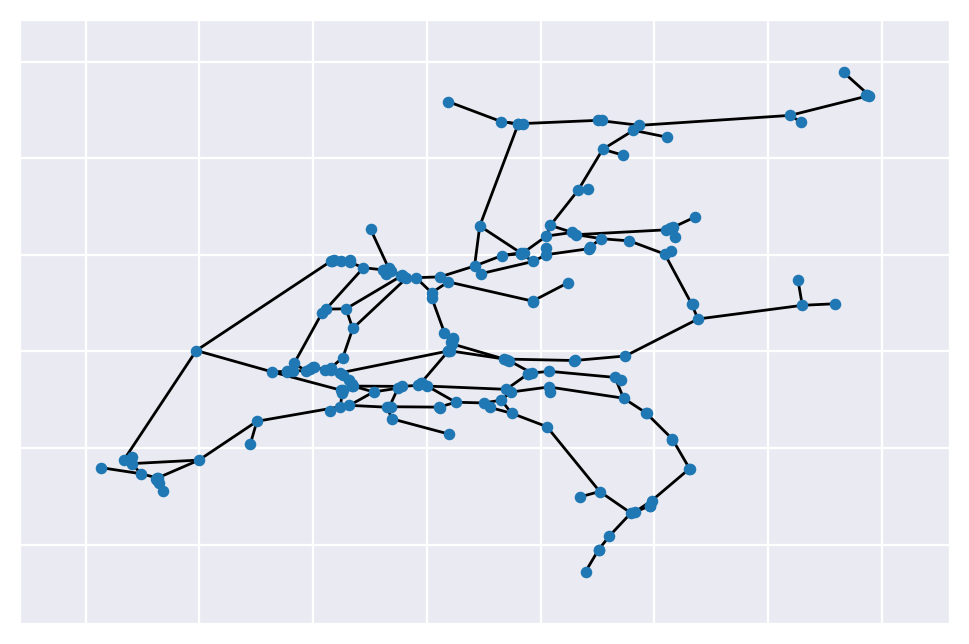

In [9]:
plt.subplots(dpi=200)
nx.draw_networkx_edges(G, pos_dict)
nx.draw_networkx_nodes(G, pos_dict, keep, node_size=10)

In [10]:
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])

harbour_nodes = df_h.harbour_node.unique()

#extract data
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')


# add degree to dataframes
df_links['degree_source'] = df_links.source.apply(lambda x: G.degree[x])
df_links['degree_target'] = df_links.source.apply(lambda x: G.degree[x])
df_nodes['degree'] = G.degree
df_nodes['degree'] = df_nodes.degree.apply(lambda x: x[1])

In [11]:
df_links

,source,target,Classification,Id_navigability,StartJunctionId,EndJunctionId,GeneralWidth,CoupledDepth,CoupledLength,SeaFairingHeight,...,GeneralHeight,Length,GeneralDepth,SeaFairingDepth,CoupledWidth,WidePushedDepth,SeaFairingWidth,GeoType,degree_source,degree_target
0,8867516,8864912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
1,8867516,8867429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
2,8867516,8860918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
3,8863630,8863818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
4,8863630,8868359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,8862106,8867986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
213,8862813,8866095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3
214,8867986,8863131,CEMT,37056.0,8867986,8863131,23.5,4.4,200.0,NaN,...,NaN,0.380,4.4,NaN,23.5,4.4,NaN,section,3,3
215,8865003,8863131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2


In [12]:
# give edges a new attribute split
nx.set_edge_attributes(G, 0, 'split')

In [13]:
to_split = df_links.loc[df_links.length_m == max(df_links.length_m)]

In [14]:
points = list(to_split.loc[(to_split.source.str.len()>5)].source.values) + list(to_split.loc[(to_split.target.str.len()>5)].target.values)

In [15]:
list(points)

['8860852', '8862614']

In [16]:
# first inserted node gets ID 100 and from there upwards
id_count = 100
for i in range(10):
    # update dataframes
    df_links = nx.to_pandas_edgelist(G)
    df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

    # find the longest link source and origin
    to_split = df_links.loc[df_links.length_m == max(df_links.length_m)]
    to_split.reset_index(inplace=True, drop=True)
    # identify source/targets points
    points = list(to_split.loc[(to_split.source.str.len()>5)].source.values) + list(to_split.loc[(to_split.target.str.len()>5)].target.values)

    org_source = points[0]
    org_target = points[1]
    print('Largest link found', to_split.length_m[0], 'original link:', org_source, org_target, 'splitted', to_split.split[0], 'times before.')

    # determine original length, also works if link has been split earlier
    original_length = 0
    for j in to_split.length_m:
        original_length += j

    org_source_data = df_nodes.loc[df_nodes.n == org_source]
    org_target_data = df_nodes.loc[df_nodes.n == org_target]

    #if never split: split in two, if split once: split in three, etc.
    split_in = round(to_split.split[0] + 2)

    #find new X and Y positions
    x_set = np.linspace(org_source_data.X.values[0], org_target_data.X.values[0], (split_in+1))
    y_set = np.linspace(org_source_data.Y.values[0], org_target_data.Y.values[0], (split_in+1))

    # remove old link(s)
    for j in to_split.index:
        G.remove_edge(to_split.source[j], to_split.target[j])
        print('Link removed between', to_split.source[j], to_split.target[j])

    # add nodes, except for outsides that already exist
    added_ids = []
    for index_pos, j in enumerate(x_set):
        if (index_pos != 0) and (index_pos != 1):
            G.add_node(str(id_count), X = x_set[index_pos], Y = y_set[index_pos])
            print('Node inserted with id', id_count, 'at (x,y):', x_set[index_pos], y_set[index_pos])
            added_ids.append(str(id_count))
            id_count += 1

    #finally, add edges
    nodes_sequence = [org_source] + added_ids + [org_target]
    print(nodes_sequence)
    for j in range(len(nodes_sequence)-1):
        G.add_edge(nodes_sequence[j],nodes_sequence[j+1], length_m=(original_length/split_in), split = int(to_split.split[0]+1))
        print("Link added between", nodes_sequence[j], nodes_sequence[j+1], "with length", (original_length/split_in))


Largest link found 141339.25714541328 original link: 8860852 8862614 splitted 0 times before.
Link removed between 8860852 8862614
Node inserted with id 100 at (x,y): 3.6686865135070996 51.4390721874278
['8860852', '100', '8862614']
Link added between 8860852 100 with length 70669.62857270664
Link added between 100 8862614 with length 70669.62857270664
Largest link found 89053.15923253143 original link: 8860852 34170247 splitted 0 times before.
Link removed between 8860852 34170247
Node inserted with id 101 at (x,y): 4.57902785234225 52.467849713301895
['8860852', '101', '34170247']
Link added between 8860852 101 with length 44526.57961626571
Link added between 101 34170247 with length 44526.57961626571
Largest link found 75895.64343792459 original link: 8861681 8862419 splitted 0 times before.
Link removed between 8861681 8862419
Node inserted with id 102 at (x,y): 6.59651980427865 53.2217842753329
['8861681', '102', '8862419']
Link added between 8861681 102 with length 37947.82171896

In [17]:
# retrieve data again
pos_dict = {}

for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])

harbour_nodes = df_h.harbour_node.unique()

#extract data
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')


# add degree to dataframes
df_links['degree_source'] = df_links.source.apply(lambda x: G.degree[x])
df_links['degree_target'] = df_links.source.apply(lambda x: G.degree[x])
df_nodes['degree'] = G.degree
df_nodes['degree'] = df_nodes.degree.apply(lambda x: x[1])

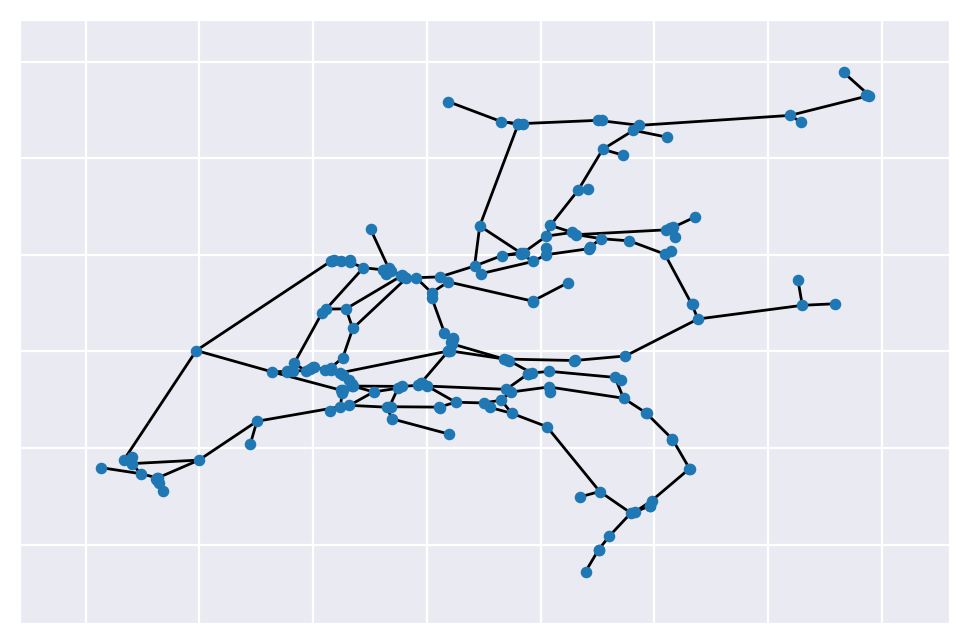

In [18]:
#check if it worked
plt.subplots(dpi=200)
nx.draw_networkx_edges(G, pos_dict)
nx.draw_networkx_nodes(G, pos_dict, keep, node_size=10)